Shape: (416125, 15)

Columns: ['id', 'sensor_id_fk', 'device_id', 'temperature_one', 'temperature_two', 'vibration_x', 'vibration_y', 'vibration_z', 'vibration_velocity', 'microphone_one', 'microphone_two', 'magnetic_flux_x', 'magnetic_flux_y', 'magnetic_flux_z', 'timestamp']

Missing values:
 id                     0
sensor_id_fk           0
device_id              0
temperature_one        0
temperature_two        0
vibration_x            0
vibration_y            0
vibration_z            0
vibration_velocity     0
microphone_one         0
microphone_two         0
magnetic_flux_x       16
magnetic_flux_y       16
magnetic_flux_z       16
timestamp              0
dtype: int64

Summary stats:
                   id  temperature_one  temperature_two    vibration_x  \
count  416125.000000    416125.000000    416125.000000  416125.000000   
mean   208063.000000        35.577997        41.964287       0.154226   
std    120125.084721         3.336802         4.794638       0.075178   
min     

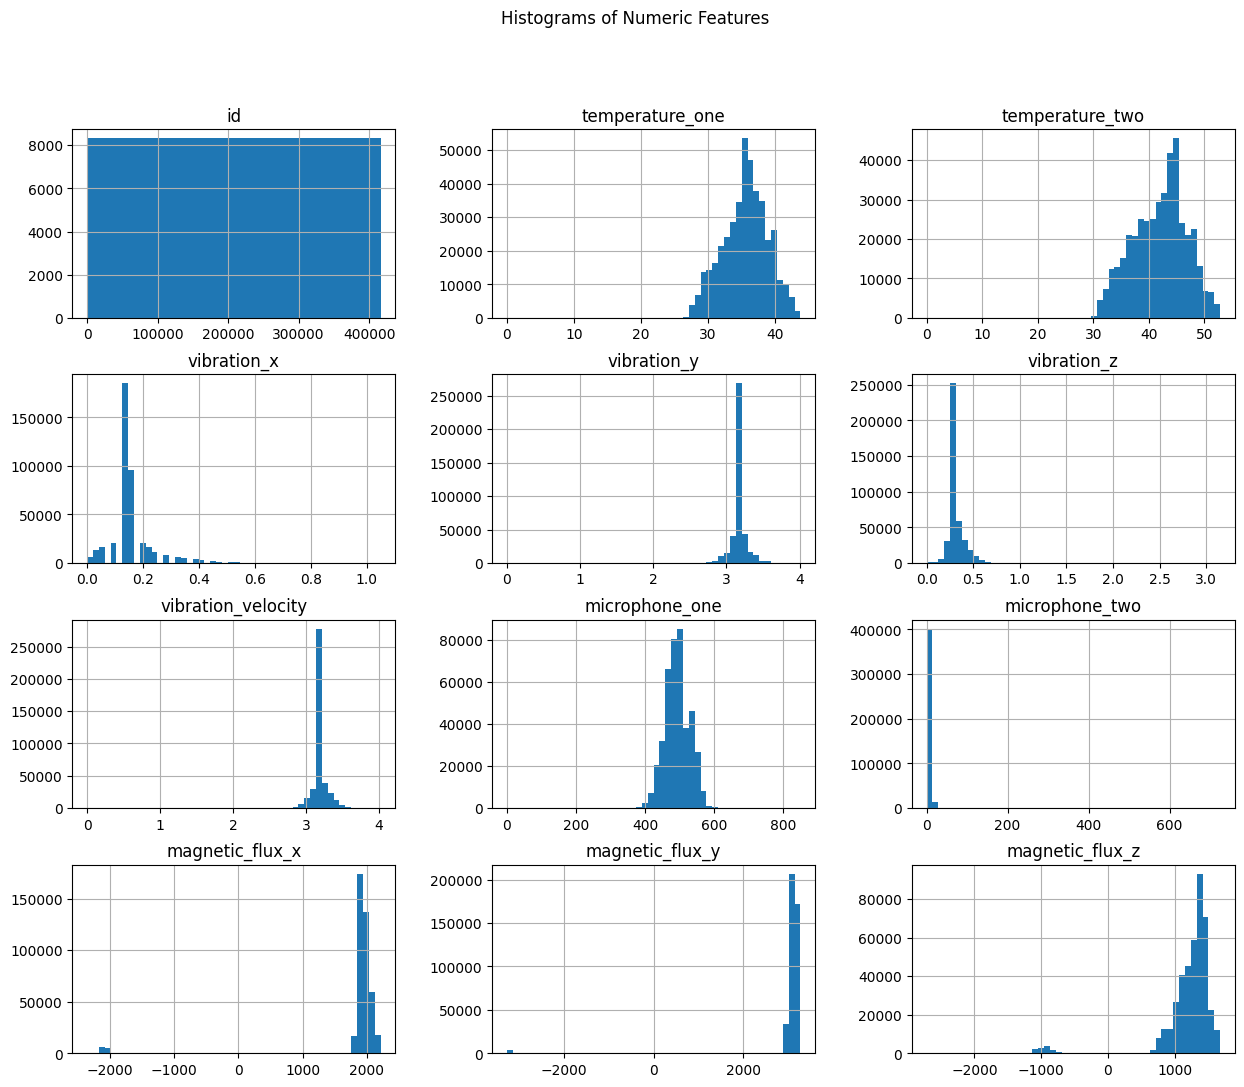

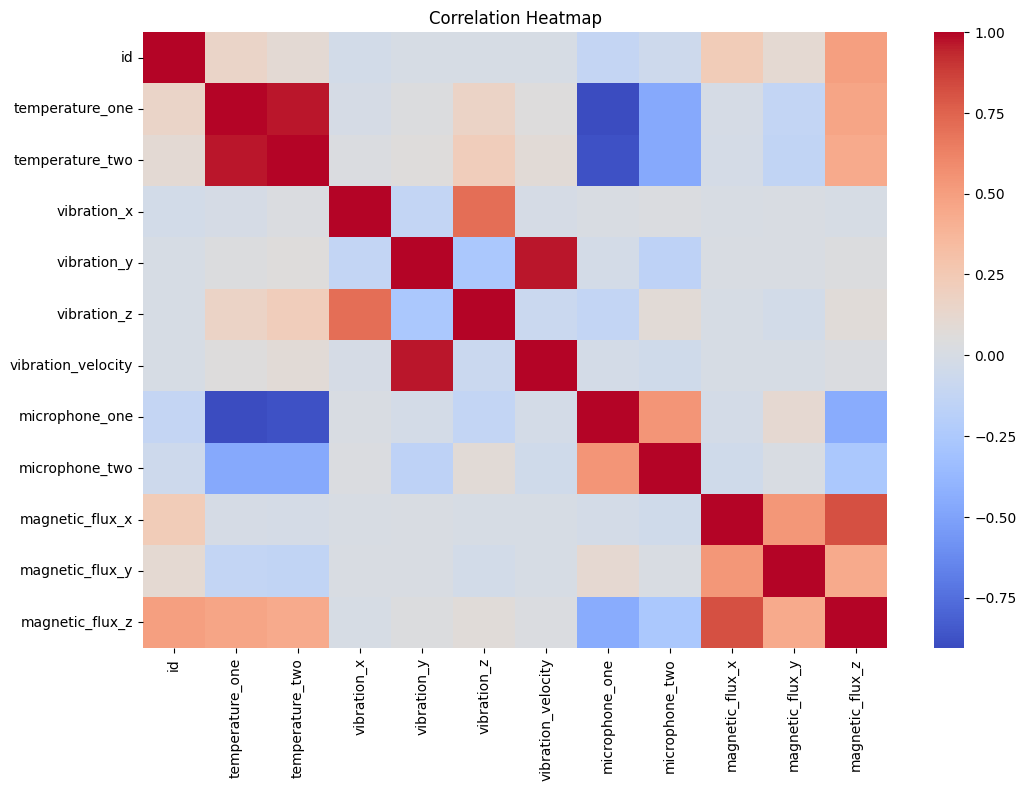

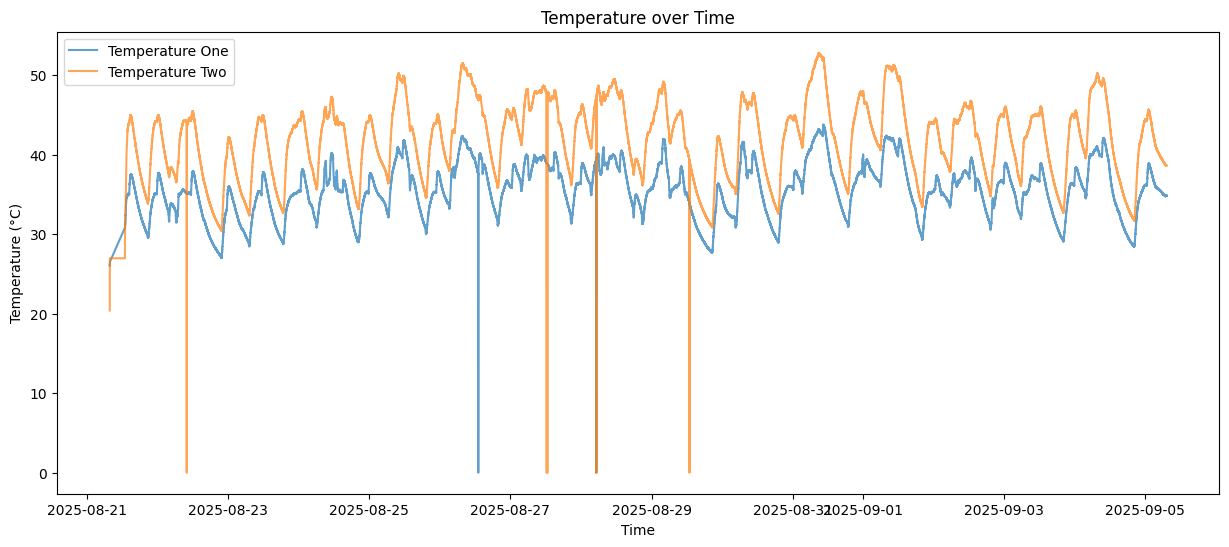

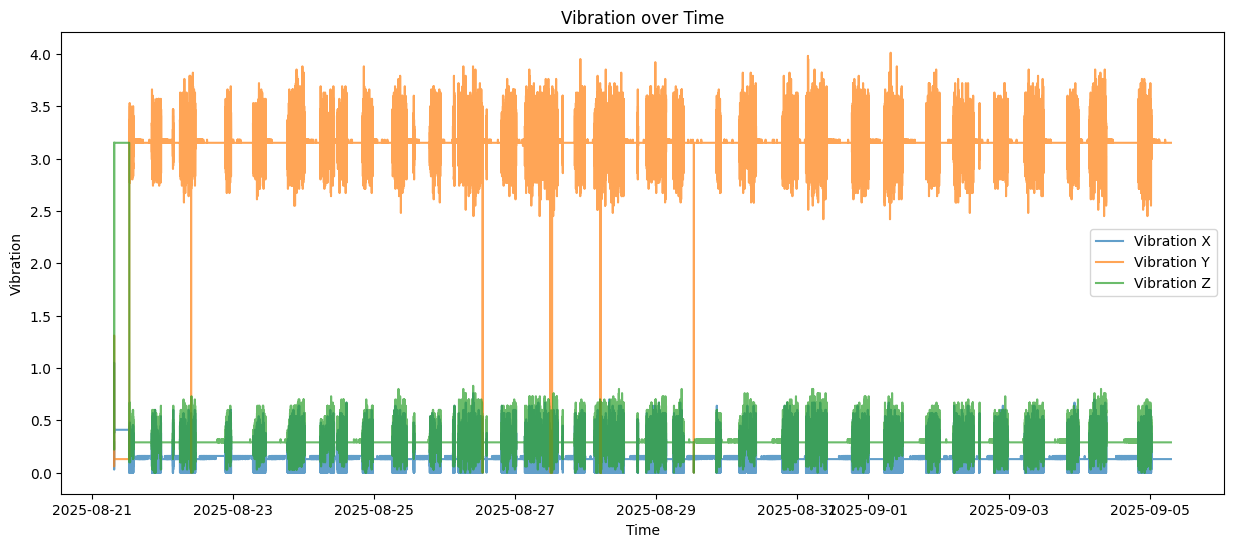

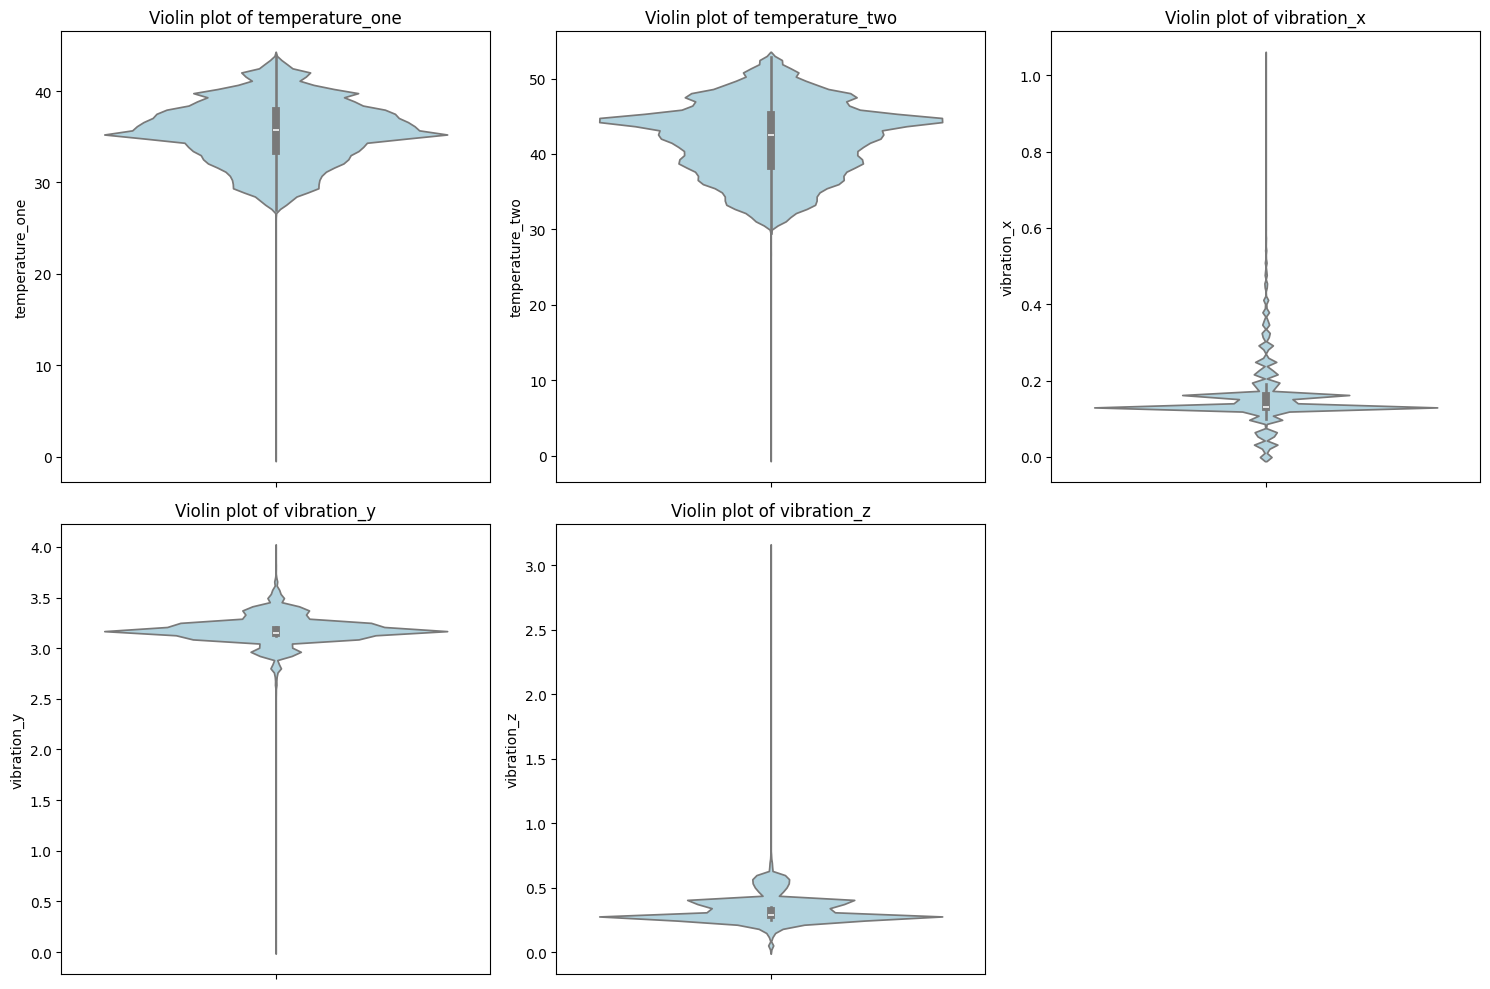

C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:77: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["temperature_one"], label="Temperature One", shade=True)
C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:78: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["temperature_two"], label="Temperature Two", shade=True)


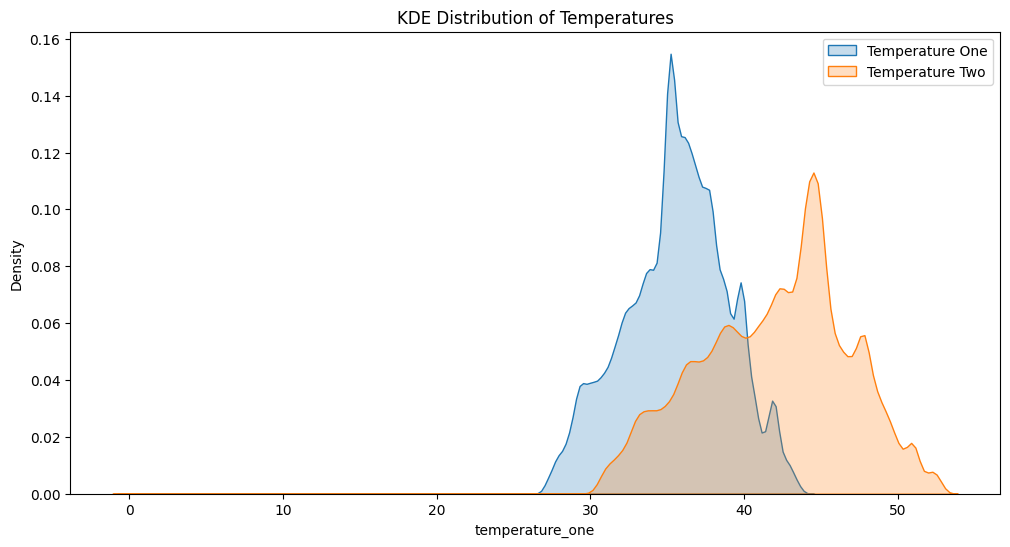

C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:87: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("timestamp")[["temperature_one", "temperature_two"]].rolling("1H").mean().plot(ax=plt.gca())


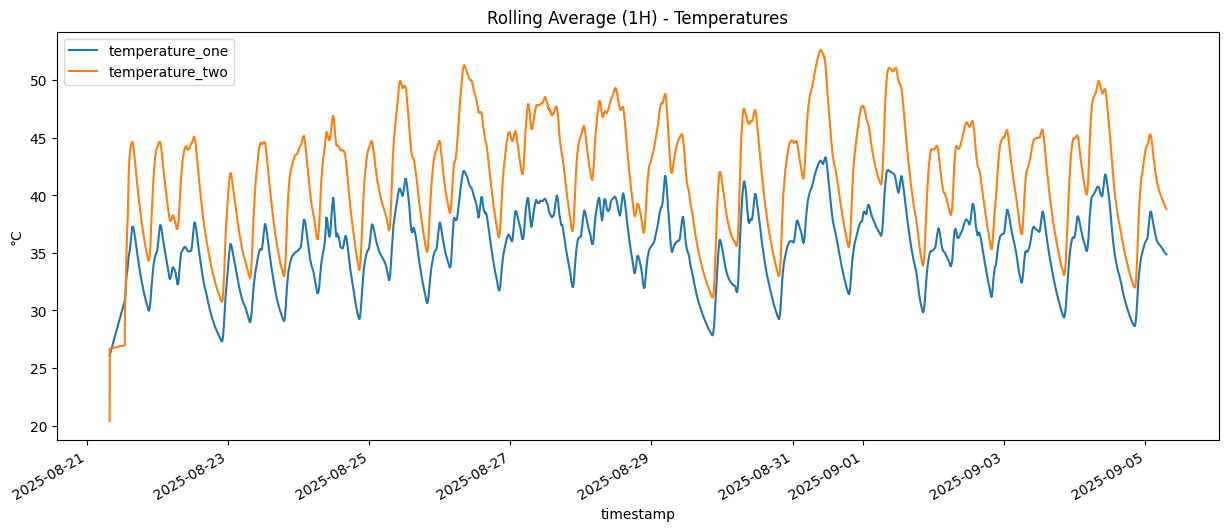

C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:93: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("timestamp")[["vibration_x", "vibration_y", "vibration_z"]].rolling("1H").mean().plot(ax=plt.gca())


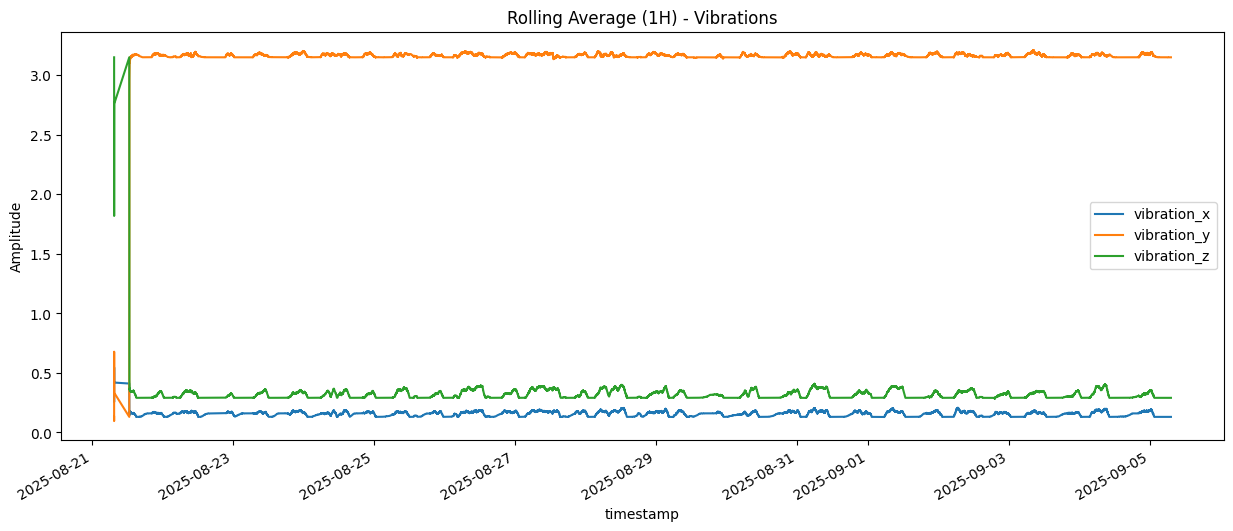

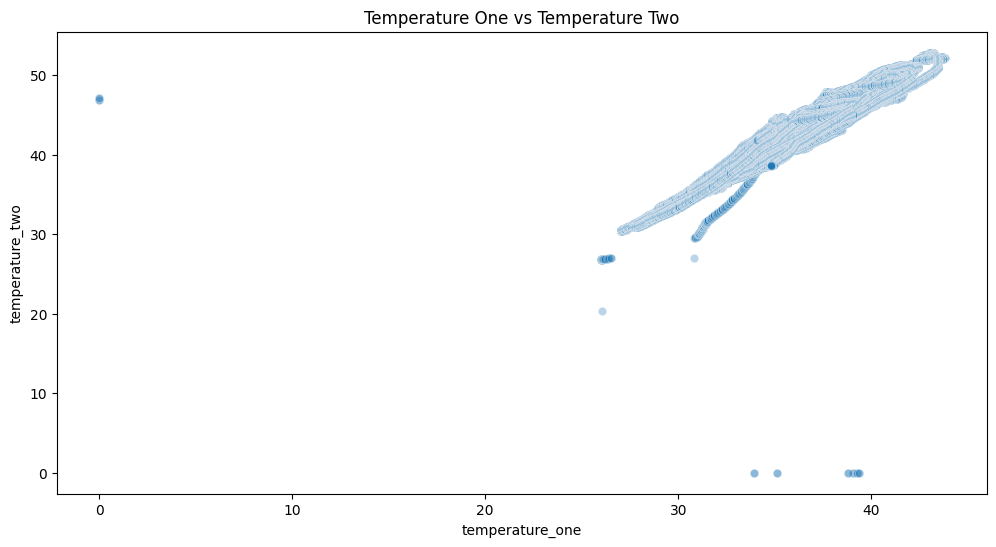

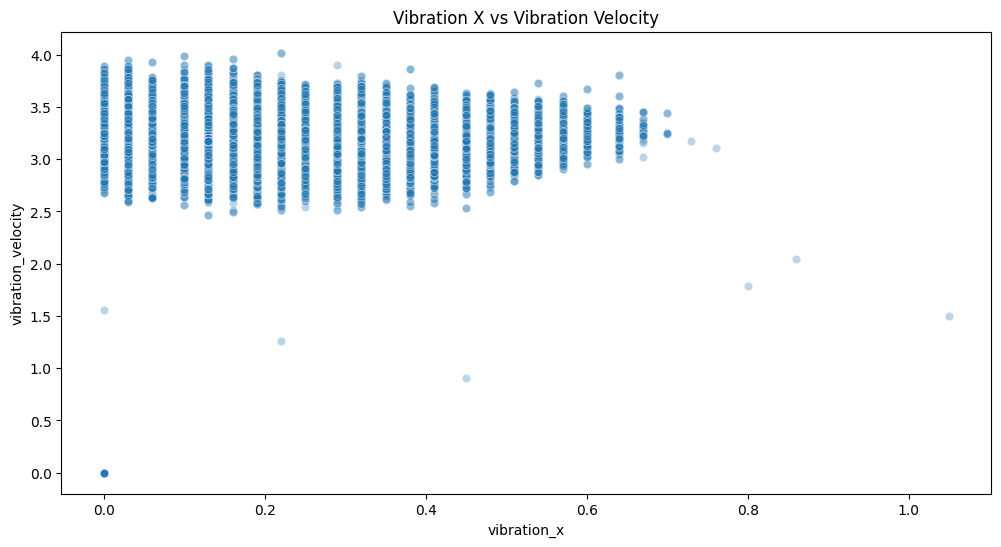

C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:115: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("timestamp")[["magnetic_flux_x", "magnetic_flux_y", "magnetic_flux_z"]].rolling("1H").mean().plot(ax=plt.gca())


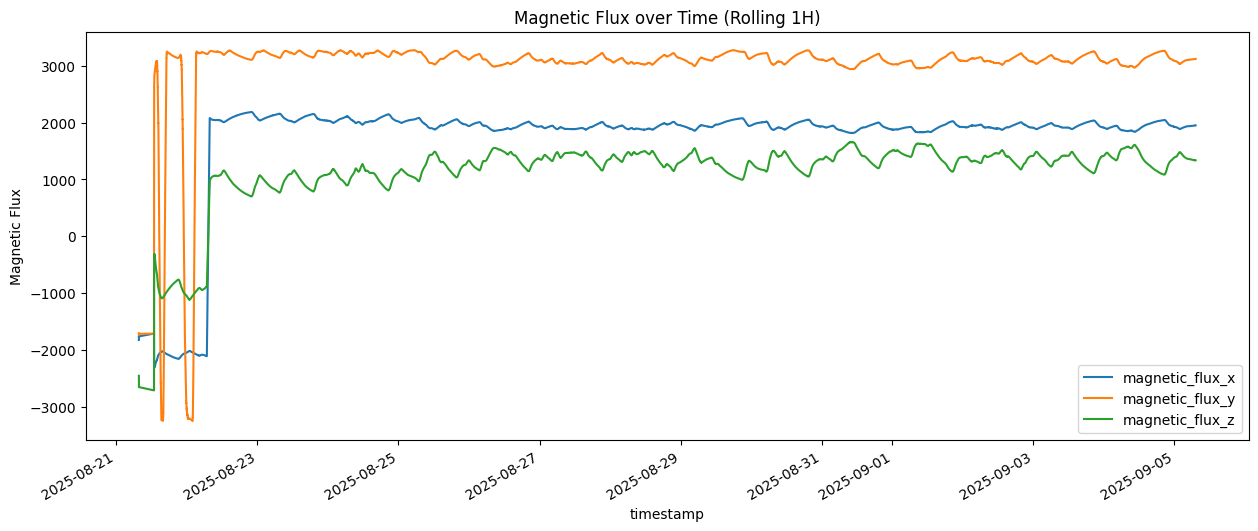

C:\Users\iema6\AppData\Local\Temp\ipykernel_35156\3342132876.py:124: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("timestamp")[["microphone_one", "microphone_two"]].rolling("1H").mean().plot(ax=plt.gca())


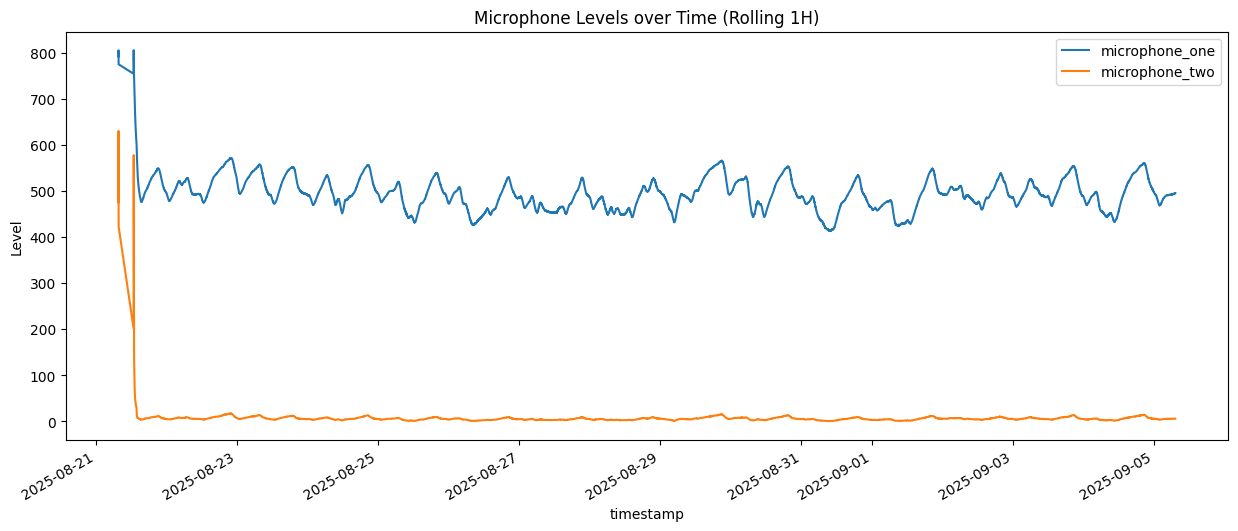

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "sensor 005 quad till today.csv"
df = pd.read_csv(file_path)
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 12), bins=50)
plt.suptitle("Histograms of Numeric Features")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
df["timestamp"] = pd.to_datetime(df["timestamp"])
plt.figure(figsize=(15,6))
plt.plot(df["timestamp"], df["temperature_one"], label="Temperature One", alpha=0.7)
plt.plot(df["timestamp"], df["temperature_two"], label="Temperature Two", alpha=0.7)
plt.legend()
plt.title("Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()
plt.figure(figsize=(15,6))
plt.plot(df["timestamp"], df["vibration_x"], label="Vibration X", alpha=0.7)
plt.plot(df["timestamp"], df["vibration_y"], label="Vibration Y", alpha=0.7)
plt.plot(df["timestamp"], df["vibration_z"], label="Vibration Z", alpha=0.7)
plt.legend()
plt.title("Vibration over Time")
plt.xlabel("Time")
plt.ylabel("Vibration")
plt.show()
plt.figure(figsize=(15,10))
for i, col in enumerate(["temperature_one", "temperature_two", 
                         "vibration_x", "vibration_y", "vibration_z"], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[col], color="lightblue")
    plt.title(f"Violin plot of {col}")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.kdeplot(df["temperature_one"], label="Temperature One", shade=True)
sns.kdeplot(df["temperature_two"], label="Temperature Two", shade=True)
plt.legend()
plt.title("KDE Distribution of Temperatures")
plt.show()
plt.figure(figsize=(15,6))
df.set_index("timestamp")[["temperature_one", "temperature_two"]].rolling("1H").mean().plot(ax=plt.gca())
plt.title("Rolling Average (1H) - Temperatures")
plt.ylabel("°C")
plt.show()

plt.figure(figsize=(15,6))
df.set_index("timestamp")[["vibration_x", "vibration_y", "vibration_z"]].rolling("1H").mean().plot(ax=plt.gca())
plt.title("Rolling Average (1H) - Vibrations")
plt.ylabel("Amplitude")
plt.show()
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["temperature_one"], y=df["temperature_two"], alpha=0.3)
plt.title("Temperature One vs Temperature Two")
plt.show()
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["vibration_x"], y=df["vibration_velocity"], alpha=0.3)
plt.title("Vibration X vs Vibration Velocity")
plt.show()
plt.figure(figsize=(15,6))
df.set_index("timestamp")[["magnetic_flux_x", "magnetic_flux_y", "magnetic_flux_z"]].rolling("1H").mean().plot(ax=plt.gca())
plt.title("Magnetic Flux over Time (Rolling 1H)")
plt.ylabel("Magnetic Flux")
plt.show()
plt.figure(figsize=(15,6))
df.set_index("timestamp")[["microphone_one", "microphone_two"]].rolling("1H").mean().plot(ax=plt.gca())
plt.title("Microphone Levels over Time (Rolling 1H)")
plt.ylabel("Level")
plt.show()

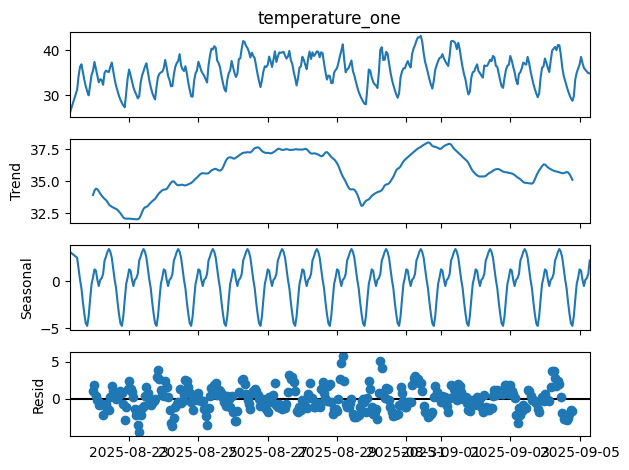

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df.set_index("timestamp")["temperature_one"].resample("1h").mean().dropna()
res = seasonal_decompose(ts, model="additive", period=24)  
res.plot()
plt.show()